In [0]:
import numpy as np
import matplotlib.pyplot as plt


##Fonction de haarl repris du tp1


def haarl_1d_direction(n,u):
	v= np.zeros((n),float)
	v= np.copy(u)
	s= (2.0)
	w= np.zeros((n))
	m=n

	while(1<m) :
		m= int(np.floor(m/2))
		w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2])/s
		w[m:m+m] = (v[0:2*m-1:2] - v[1:2*m:2]) / s
		v[0:m+m:1] = w[0:m+m:1]

	return v

def ex3(n):
	x= np.zeros((n))
	for i in range (int(n/2), n):
		x[i] = 0.5
	return x

def ex1(n):
	x= np.zeros((n))
	for i in range (n):
		x[i] = i+1
	return x

def ex2(n,x):
  v= np.zeros((n))
  if n < len(x):    
    for i in range(0,n):
      v[i] = x[i]
  else:
    for i in range(0,len(x)):
      v[i] = x[i]
  return v

def haarl_1d_inverse(n,u):
	v= np.zeros((n),float)
	v= np.copy(u)
	w= np.zeros((n))
	m=1

	while m < n:
		w[0:2*m:2] = ( v[0:m] + v[m:2*m])
		w[1:2*m:2] = ( v[0:m] - v[m:2*m])
		v[0:2*m] = w[0:2*m]
		m=2*m
	##v[1:m/2:2] = w[m/2:m:2]
	##v[m/2:m:2] = w[1:m/2:2]
	return v

def sueillage(x,T):
	y= np.copy(x)
	y[np.absolute(y)<=T]=0
	return y

def normeL2(x,y):
    if len(x)!=len(y):
        print("Les deux vecteurs on des tailles différente")
    else:
        n=len(x)
        v=0
        for i in range(n):
            v=v + np.square(np.absolute(x[i]-y[i]))
        v= np.sqrt(v)
        return v
      
size = 8 #CHoisir une valeur égale a une puissance de 2

tab1 = ex1(size)
img = [78,15,47,96,12,45,125,147,12,58,78,45,12,12,47,15,48,78,210,45,87,95,21,36,78,147,63,14,25,35,14,78,111,46,85,21,74,36,52,52,52,14,174,175,177,68,71,68,74,7,6]
tab2 = ex2(size,img)
tab3 = ex3(size)

Exercice 1

In [0]:
def quad_1d_direct(n,u):
    v = np.copy(u)
    res = np.zeros((n))
    m = n
    while 1 < m :
      m = (m//2)
      w = np.zeros((m))
      #Downsizing
      w[0:m] = (v[0:2*m-1:2] + v[1:2*m:2]) / 2
      w2 = np.copy(w)
      #Upsizing
      if m == 1:
        w[0] = w[0] - v[0]
        res[m:m*2] = w[0:m]
      else :
        w[1:m-1] = (w2[1:m-1] - (w2[0:m-2] - w2[2:m])/8)
        w[0] = (w2[0] - (w2[m-1] - w2[1])/8) 
        w[m-1] = (w2[m-1] - (w2[m-2] - w2[0])/8) 
        w[0:m] = w[0:m] - v[0:m*2:2]
        res[m:m*2] = w[0:m]
        v = np.copy(w2)
    res[0] = w2[0]

    return res
  
def concat(x,x1):
    n = len(x)
    w = np.zeros((2*n))
    for i in range(n):
        w[0:2*n-1:2] = x[0:n]
        w[1:2*n:2] = x1[0:n]
    return w
  
def quadInv(x):
    n=1
    i=np.array(1) #indice parcours de x, on commence a partir du deuxieme nombre
    x2 = np.copy([x[0]]) # liste des moyenennes avec lesquelles on construit x1 
    m = len(x)
    while(n<= m/2):
        x1=np.zeros((n))
        x1b=np.zeros((n))
        w = np.zeros((n)) 
        
        if n > 1 :             
            w[1:n-1] = x2[1:n-1] - (x2[0:n-2] - x2[2:n])/8
            w[0] = x2[0] - (x2[(n-1)] - x2[1])/8
            w[n-1] = (x2[n-1] - (x2[(n-2)] - x2[0])/8) 
        if n == 1 :
            w[0] = x2[0] 
        print(i,"i\n")
        x1[0:n] = w[0:n] - x[i:i+n]
        print(x1,"x1\n")
        x1b[0:n] = 2*x2[0:n]-x1[0:n]
        print(x1b,"x1b\n")
        x1 = concat(x1,x1b)
        print(x1,"x1\n")
        i=i+n
        x2 = np.copy(x1)
        print(x2,"x2\n")
        n = len(x1)
    return x1


Exercice 2

In [19]:
print(tab1)  
print (quadInv(quad_1d_direct(size,tab1)))


[1. 2. 3. 4. 5. 6. 7. 8.]
1 i

[2.5] x1

[6.5] x1b

[2.5 6.5] x1

[2.5 6.5] x2

2 i

[1.5 5.5] x1

[3.5 7.5] x1b

[1.5 3.5 5.5 7.5] x1

[1.5 3.5 5.5 7.5] x2

4 i

[1. 3. 5. 7.] x1

[2. 4. 6. 8.] x1b

[1. 2. 3. 4. 5. 6. 7. 8.] x1

[1. 2. 3. 4. 5. 6. 7. 8.] x2

[1. 2. 3. 4. 5. 6. 7. 8.]


In [0]:
print()
print(tab2)  
print (quadInv(quad_1d_direct(size,tab2)))



[ 78.  15.  47.  96.  12.  45. 125. 147.  12.  58.  78.  45.  12.  12.
  47.  15.  48.  78. 210.  45.  87.  95.  21.  36.  78. 147.  63.  14.
  25.  35.  14.  78. 111.  46.  85.  21.  74.  36.  52.  52.  52.  14.
 174. 175. 177.  68.  71.  68.  74.   7.   6.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]
[ 78.  15.  47.  96.  12.  45. 125. 147.  12.  58.  78.  45.  12.  12.
  47.  15.  48.  78. 210.  45.  87.  95.  21.  36.  78. 147.  63.  14.
  25.  35.  14.  78. 111.  46.  85.  21.  74.  36.  52.  52.  52.  14.
 174. 175. 177.  68.  71.  68.  74.   7.   6.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]


In [0]:
print()
print(tab3)  
print (quadInv(quad_1d_direct(size,tab3)))


[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


Exercice 3

In [0]:
def sueillage(x,T):
	y= np.copy(x)
	y[np.absolute(y)<=T]=0
	return y

quad1 = quad_1d_direct(size,tab1)
quad2 = quad_1d_direct(size,tab2)
quad3 = quad_1d_direct(size,tab3)
haar1 = haarl_1d_direction(size,tab1)
haar2 = haarl_1d_direction(size,tab2)
haar3 = haarl_1d_direction(size,tab3)

In [0]:
print(sueillage(quad1,12))
print(sueillage(haar1,12))

[32.5 16.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0. ]
[ 32.5 -16.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0. ]


In [0]:
print(sueillage(quad1,128))
print(sueillage(haar1,128))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(sueillage(quad2,12))
print(sueillage(haar2,12))

[ 51.265625    0.          0.        -37.15625     0.          0.
  12.4140625   0.         15.984375  -12.515625  -15.015625  -20.984375
   0.          0.        -23.359375    0.         22.78125    52.40625
   0.         15.375      37.03125   -33.71875   -39.71875     0.
   0.          0.         76.0625    -36.75      -30.75        0.
   0.          0.        -22.5625     22.25       24.5625      0.
  13.6875    -19.375       0.          0.         27.0625    -79.
   0.          0.         35.75      -34.8125      0.         38.0625
 -31.625     -34.9375    -19.125       0.          0.          0.
 -67.625       0.        -41.8125      0.          0.          0.
   0.          0.          0.          0.       ]
[ 51.265625   0.         0.        37.15625   17.875      0.
 -20.125      0.         0.        13.375     17.75      18.75
   0.         0.         0.         0.       -12.5      -53.75
 -13.25       0.       -32.25      31.25      37.         0.
  12.75       0.       -70.

In [0]:
print(sueillage(quad2,128))
print(sueillage(haar2,128))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(sueillage(quad3,12))
print(sueillage(haar3,12))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
print(sueillage(quad3,128))
print(sueillage(haar3,128))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Exercice 4

In [0]:
def normeL2(x,y):
    if len(x)!=len(y):
        print("Les deux vecteurs on des tailles différente")
    else:
        n=len(x)
        v=0
        for i in range(n):
            v=v + np.square(np.absolute(x[i]-y[i]))
        v= np.sqrt(v)
        return v
      
quadS11 = quadInv(sueillage(quad1,12))
quadS12 = quadInv(sueillage(quad1,128))

quadS21 = quadInv(sueillage(quad2,12))
quadS22 = quadInv(sueillage(quad2,128))

quadS31 = quadInv(sueillage(quad3,12))
quadS32 = quadInv(sueillage(quad3,128))

haarS11 = haarl_1d_inverse(size,sueillage(haar1,12))
haarS12 = haarl_1d_inverse(size,sueillage(haar1,128))

haarS21 = haarl_1d_inverse(size,sueillage(haar2,12))
haarS22 = haarl_1d_inverse(size,sueillage(haar2,128))

haarS31 = haarl_1d_inverse(size,sueillage(haar3,12))
haarS32 = haarl_1d_inverse(size,sueillage(haar3,128))


In [0]:
print(normeL2(tab1,quadS11))
print(normeL2(tab1,haarS11))

88.27367777259538
73.86474125047755


In [0]:
print(normeL2(tab1,quadS12))
print(normeL2(tab1,haarS12))

299.0652102802999
299.0652102802999


In [0]:
print(normeL2(tab2,quadS21))
print(normeL2(tab2,haarS21))

130.5367342379395
110.42793181527942


In [0]:
print(normeL2(tab2,quadS22))
print(normeL2(tab2,haarS22))

577.5560578852931
577.5560578852931


In [0]:
print(normeL2(tab3,quadS31))
print(normeL2(tab3,haarS31))

2.8284271247461903
2.8284271247461903


In [0]:
print(normeL2(tab3,quadS32))
print(normeL2(tab3,haarS32))

2.8284271247461903
2.8284271247461903


Exercice 5

exemple 1:

Quadratique

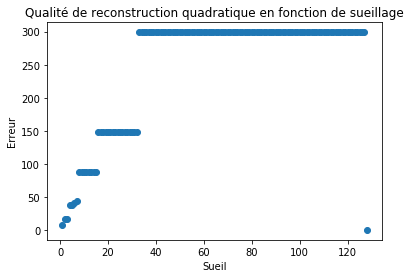

In [0]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab1,quadInv(sueillage(quad1,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction quadratique en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()


Haarl

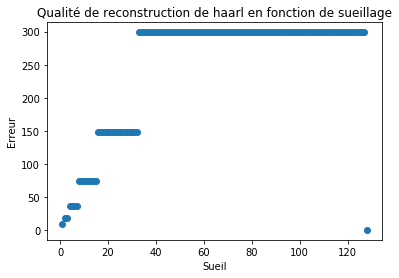

In [0]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab1,haarl_1d_inverse(size,sueillage(haar1,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haarl en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

Exemple 2:

Quadratique

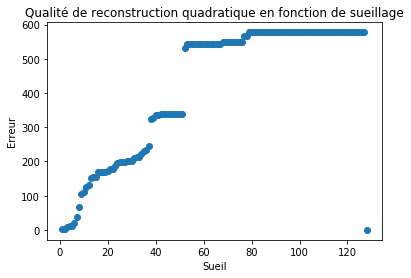

In [0]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab2,quadInv(sueillage(quad2,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction quadratique en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

Haarl

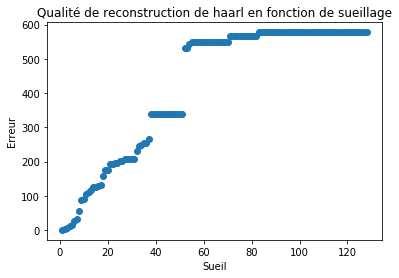

In [0]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(129):
  tab4[i-1] = normeL2(tab2,haarl_1d_inverse(size,sueillage(haar2,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haarl en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

Exemple 3:

Quadratique

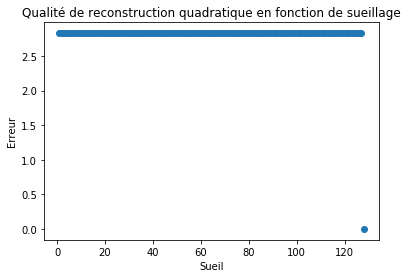

In [0]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab3,quadInv(sueillage(quad3,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction quadratique en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()

Haarl

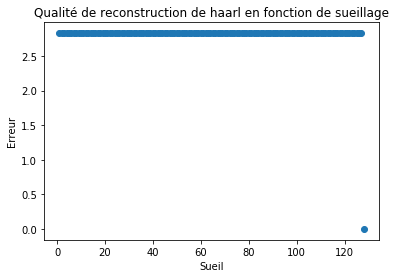

In [0]:
t = ex1(128)
tab4 = np.zeros((128))

for i in range(128):
  tab4[i-1] = normeL2(tab3,haarl_1d_inverse(size,sueillage(haar3,i)))

plt.scatter(t,tab4)
plt.title('Qualité de reconstruction de haarl en fonction de sueillage')
plt.xlabel('Sueil')
plt.ylabel('Erreur')
plt.show()